# EDA (Exploratory Data Analysis)

 Consiste en investigar y comprender los datos mediante técnicas visuales y estadísticas para descubrir patrones, identificar anomalías, probar hipótesis y extraer información útil. <div>El EDA ayuda a los científicos de datos y analistas a obtener una comprensión inicial de los datos antes de aplicar modelos predictivos o análisis más avanzados.

## 1. Conociemiento del negocio 

### ***Contexto***

---------------------------------------
##### Steam, una plataforma multinacional de videojuegos, donde distribuye digitalmente videojuegos desarrollada por Valve Corporation. Fue lanzada en septiembre de 2003 como una forma para Valve de proveer actualizaciones automáticas a sus juegos, pero finalmente se amplió para incluir juegos de terceros.  *Objectivo; Steam pide que te encargues de crear un sistema de recomendación de videojuegos para usuarios.*

**Preguntas**
>
>
> **1.Datos** <div>
> 1. ¿En qué formato se encuentra los datos? 
> 2. ¿Qué variables (Columnas) estan disponibles en el cojunto de datos?  
> 3. ¿Qué tipos de datos están incluidos? 
> 4. ¿Hay Valores faltantes?
> 5. ¿Hay columnas anidadas? </div>
>  
> **2.Analisís Descriptivo** <div>
> 1. ¿Cuál es el promedio de juagdores de Valve o Steam? ; Cada año?
> 2. ¿Cuál es la distribución de las variables categóricas (frecuencia de cada categoría)? </div>
> 
> **3. Analisís de Juegos** <div>
> 1. ¿Cuáles son los juegos con la mayor cantidad de jugadores? 
> 2. ¿Cómo se distribuyen los precios de los juegos? 
> 3. ¿Existe alguna correlación entre el precio de un juego y su popularidad o calificación?</div>
> 
> **4. Analísis de Reseñas** <div>
> 1.  ¿Cómo se distribuyen las calificaciones de las reseñas a lo largo del tiempo? 
> 2. Hay alguna tendencia temporal en las calificaciones de las reseñas (por ejemplo, aumentos o disminuciones notables en ciertos períodos)? </div>
>
>
> **5. Adicional** <div>
> 1. ¿Qué variables están más correlacionadas con las calificaciones de los juegos (precio, cantidad de reseñas, cantidad de items, etc.)? </div>

***Las preguntas pueden cambiar***

## 2. Entendimiento de datos

###  ***Data***  ***Games***

### 2.1 Importamos  librerías

In [44]:
# Importamos las librerias 
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import seaborn as sns  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

### 2.2 Carga inicial de los datos

In [3]:
# Cargar el archivo 
games = pd.read_json("Data/output_steam_games.json", lines=True)

In [4]:
# Convertimos en Dataframe
df_games = pd.DataFrame(games)

### 2.3 Análisis inicial de los datos

In [5]:
# Tamaño de nuestra data 
df_games.shape

(120445, 13)

La Base de datos games tiene 120445 registros y 13 columnas

In [6]:
# Columnas 
df_games.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer'],
      dtype='object')

In [7]:
# Tipo de datos 
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


In [8]:
df_games.tail(5)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"
120444,None,None,Maze Run VR,None,http://store.steampowered.com/app/681550/Maze_...,None,"[Early Access, Adventure, Indie, Action, Simul...",http://steamcommunity.com/app/681550/reviews/?...,"[Single-player, Stats, Steam Leaderboards, HTC...",4.99,1.0,681550.0,None


In [9]:
df_games.describe()

,early_access,id
count,32135.000000,3.213300e+04
mean,0.060588,4.517574e+05
std,0.238577,1.827140e+05
min,0.000000,1.000000e+01
25%,0.000000,3.292800e+05
50%,0.000000,4.520600e+05
75%,0.000000,5.934000e+05
max,1.000000,2.028850e+06


In [10]:
def null(df, decimales=2):
    """
    Vamos a observar cuantos valores falatantes hay en el dataset
    """
    df_nulos = pd.DataFrame({
        "Numeros de nulos" : df.isnull().sum(),
        "Porcentaje de nulos" : (df.isnull().sum() / df.shape[0]) * 100.0
    })
    df_nulos['Porcentaje de nulos'] = df_nulos['Porcentaje de nulos'].round(decimales).astype(str) + "%"
    return df_nulos

In [11]:
null(df_games, decimales= 2)

,Numeros de nulos,Porcentaje de nulos
publisher,96362,80.0%
genres,91593,76.05%
app_name,88312,73.32%
title,90360,75.02%
url,88310,73.32%
release_date,90377,75.04%
tags,88473,73.46%
reviews_url,88312,73.32%
specs,88980,73.88%
price,89687,74.46%



##### Hacemos una pequeña preparación de los datos para que en describe() esté el precio y el año. <div> ***Toda la preparación de los datos estará en el archivo ETL.***<div>  Tambien Vemos que los cuartiles y la media es cero, podemos apreciar que gracias a la gran cantidad de datos faltantes nuestro analisís estadístico no es acertado. <div> ***Procedo a eliminar los datos faltantes.***

In [12]:
df_games = df_games.dropna(how='all')
print(df_games.shape)

(32135, 13)


In [13]:
#Observemos los valores no numericos en la columna 'price'
mask_filter = pd.to_numeric(df_games['price'], errors='coerce').isna()
no_numeric_values = df_games.loc[mask_filter, 'price'].unique()
print(no_numeric_values)

['Free To Play' 'Free to Play' None 'Free' 'Free Demo' 'Play for Free!'
 'Install Now' 'Play WARMACHINE: Tactics Demo' 'Free Mod' 'Install Theme'
 'Third-party' 'Play Now' 'Free HITMAN™ Holiday Pack' 'Play the Demo'
 'Starting at $499.00' 'Starting at $449.00' 'Free to Try' 'Free Movie'
 'Free to Use']


In [14]:
#convertimos los valores no numericos a 0 (cero) para representar a los juegos gratis 
df_games['price'] = pd.to_numeric(df_games['price'], errors= 'coerce')
df_games['price'].fillna(0, inplace=True)

In [15]:
df_games['price'].astype('float16')

88310     4.988281
88311     0.000000
88312     0.000000
88313     0.990234
88314     2.990234
            ...   
120440    1.990234
120441    4.988281
120442    1.990234
120443    4.988281
120444    4.988281
Name: price, Length: 32135, dtype: float16

In [16]:
# Ahora transformaremos la columna release_date a tipo to_datetime para mejor manipulacion 
df_games['release_date'] = pd.to_datetime(df_games['release_date'], format= '%Y-%m-%d', errors='coerce')

In [17]:
# Creamos una columna nueva con esos valores, pero solo extraeremos el año y cambiamos el tipo de dato
df_games['Year'] = df_games['release_date'].dt.year.astype('Int64')

In [18]:
# Buscamos cuales son los valores faltantes, ademas cuantos de esos valores existen 
mask_filter = df_games['Year'].isna()
diferent_Value = df_games.loc[mask_filter, 'Year'].unique()
print(f"Valores unicos faltantes {diferent_Value}, Numero de valores faltantes {mask_filter.sum()}")

Valores unicos faltantes <IntegerArray>
[<NA>]
Length: 1, dtype: Int64, Numero de valores faltantes 2352


In [19]:
# LLenamos los valores NAN con la mediana
def llenar_nan(df, columna):
    mediana = df_games['Year'].median()
    df[columna] = df[columna].fillna(mediana)
    return df 

df_games = llenar_nan(df_games, 'Year')

In [20]:
# Para el analisis necesitamos solo el anio, para ello eliminamos la columna 'release_date'
df_games = df_games.drop(columns=['release_date'])

In [21]:
# Veamos como quedo el describe()
df_games.describe()

,price,early_access,id,Year
count,32135.000000,32135.000000,3.213300e+04,32135.0
mean,8.486906,0.060588,4.517574e+05,2014.849977
std,15.662265,0.238577,1.827140e+05,3.392811
min,0.000000,0.000000,1.000000e+01,1970.0
25%,1.990000,0.000000,3.292800e+05,2014.0
50%,4.990000,0.000000,4.520600e+05,2016.0
75%,9.990000,0.000000,5.934000e+05,2017.0
max,995.000000,1.000000,2.028850e+06,2021.0


In [22]:
null(df_games, decimales=2)

,Numeros de nulos,Porcentaje de nulos
publisher,8052,25.06%
genres,3283,10.22%
app_name,2,0.01%
title,2050,6.38%
url,0,0.0%
tags,163,0.51%
reviews_url,2,0.01%
specs,670,2.08%
price,0,0.0%
early_access,0,0.0%


<Axes: >

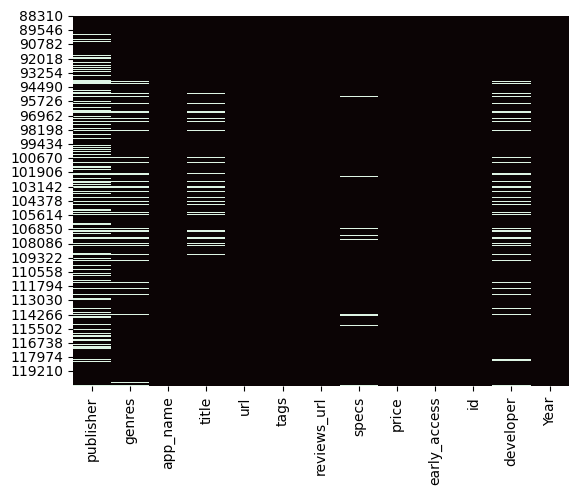

In [23]:
# Visualizemos 
sns.heatmap(df_games.isnull(), cbar=False, cmap='mako')

In [24]:
# Resetamos el indice
df_games = df_games.reset_index(drop=True)

### 2.4. Análisis de variables Cuantitativas

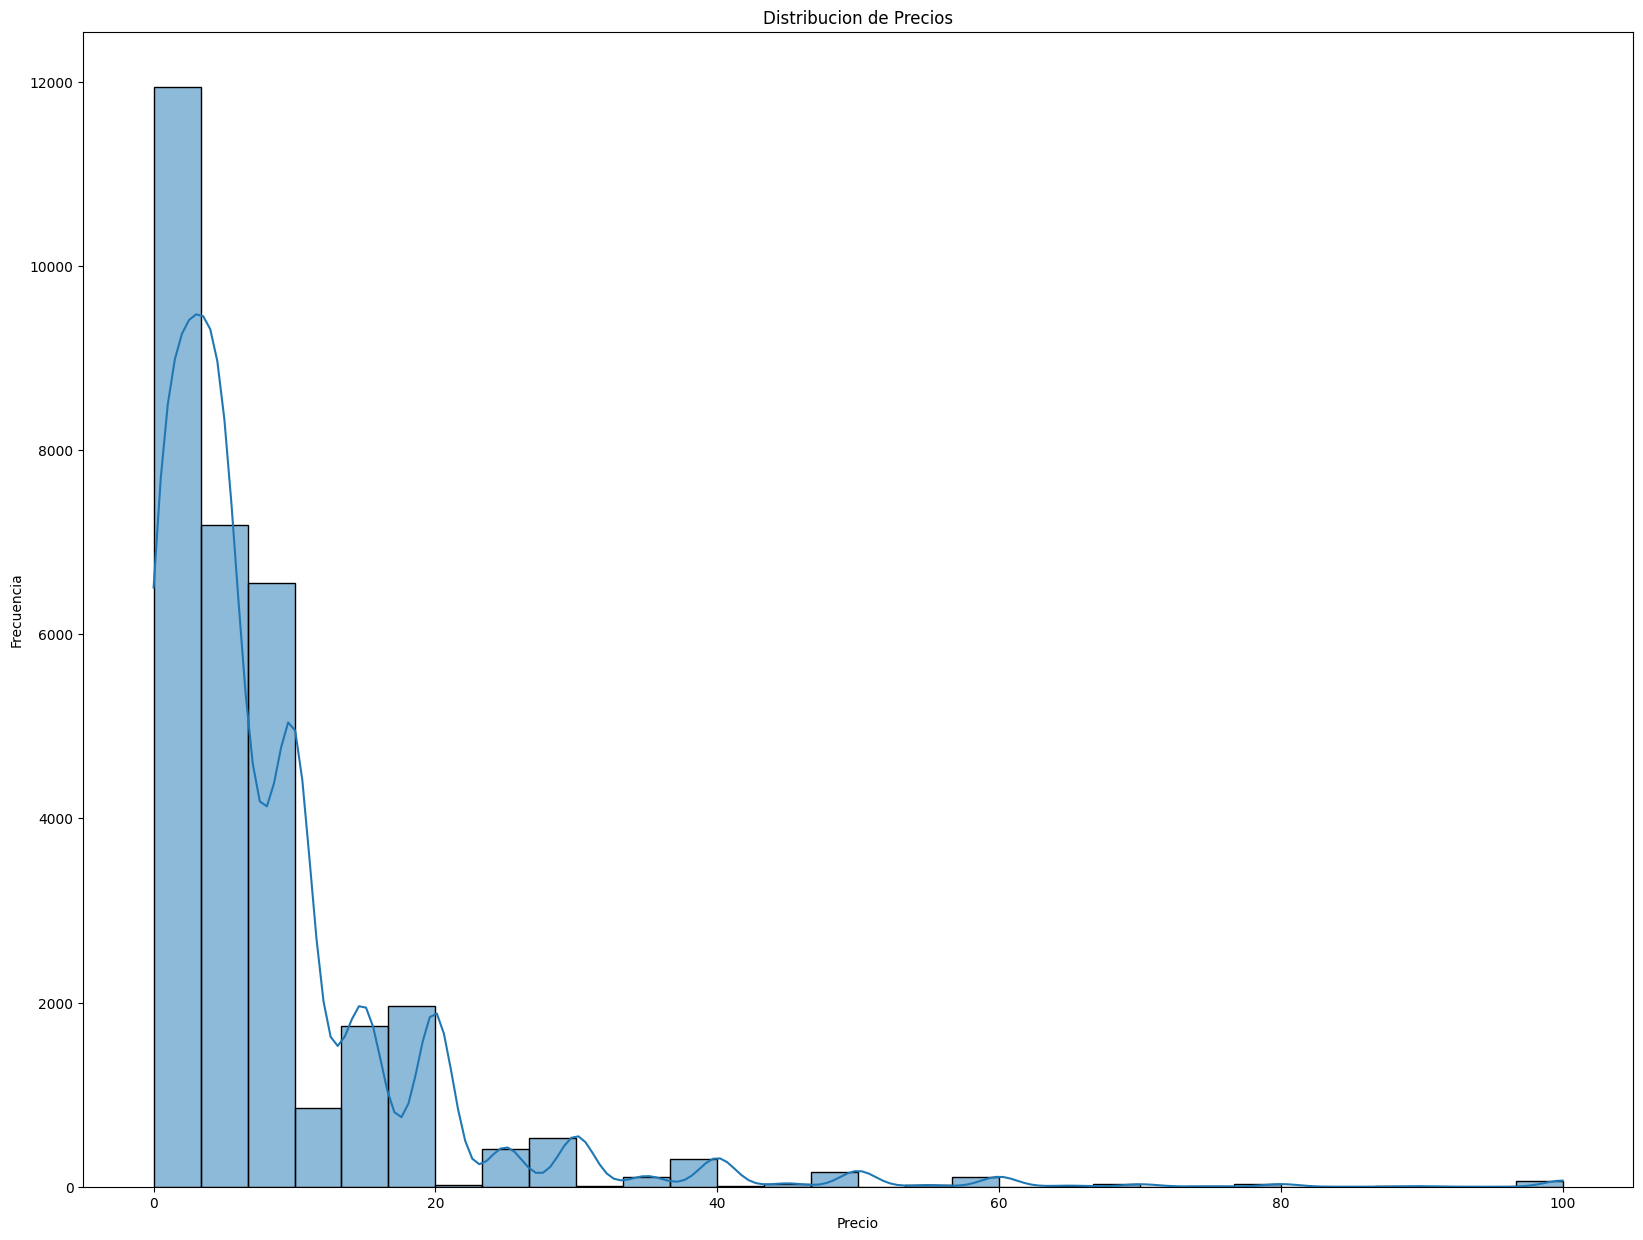

In [25]:
filtros = df_games[df_games['price']< 100]
# Veamos su distribucion 
plt.figure(figsize=(20,15))
sns.histplot(filtros['price'], bins=30, kde=True)
plt.title('Distribucion de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

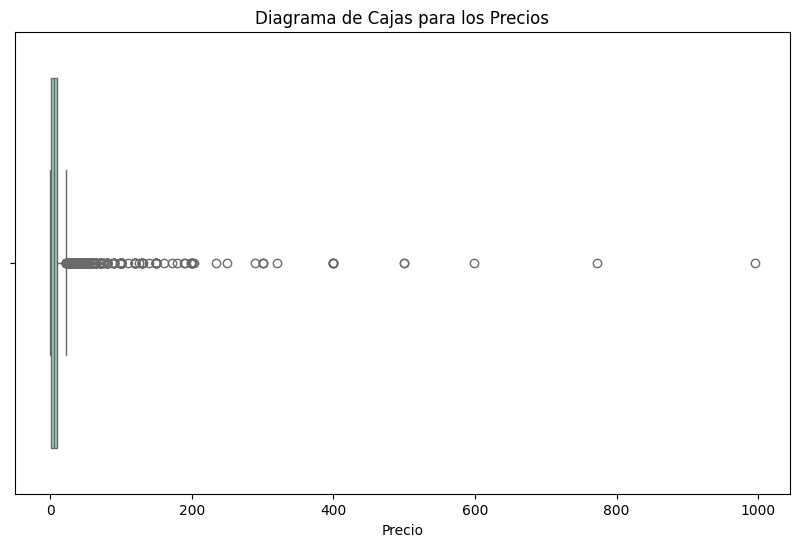

In [37]:
#Diagrama de caja '
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_games['price'], palette='Set3')
plt.title('Diagrama de Cajas para los Precios')
plt.xlabel('Precio')
plt.show()

In [42]:
# Tratamiento de valores atipicos o outliers
# Buscamos el 1er cuartil y 3er cuartil
q1, q3 = np.percentile(df_games['price'], [25, 75])
print("1er cuartil = ", q1)
print("3er cuartil = ", q3)

# Buscamos la diferencia
iqr = q3 - q1
print("IQR es la diferencia entre el 3er y 1er cuartil = ",iqr)

# Limite inferior y superior 
limite_inferior = q1 - (1,5 * iqr)
limite_superior = q3 + (1,5 * iqr)
print("Limite Inferior = ", limite_inferior)
print("Limite superior = ", limite_superior)

1er cuartil =  1.99
3er cuartil =  9.99
IQR es la diferencia entre el 3er y 1er cuartil =  8.0
Limite Inferior =  [  0.99 -38.01]
Limite superior =  [10.99 49.99]


Usaremos z_score para el tratamiento de valores atípicos.<div>
+ Las puntuaciones Z pueden ser positivas o negativas: un valor positivo indica que la puntuación está por encima de la media y un puntaje negativo indica que está por debajo de la media.<div>
+ Cualquier valor que esté por encima de +3 sd (desviaciones estándar) y -3 sd se considera un valor atípico.

In [45]:
# Usaremos z_score para el tratamiento de valores atípicos.
df_games['Zscore_price'] = stats.zscore(df_games['price'])
# Detectar valores atípicos (z_score)
df_games[(df_games['Zscore_price'] < -3) | (df_games['Zscore_price']> 3)]

,publisher,genres,app_name,title,url,tags,reviews_url,specs,price,early_access,id,developer,Year,Zscore_price
18,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - Lifetime Pack,SNOW - Lifetime Pack,http://store.steampowered.com/app/774279/SNOW_...,"[Free to Play, Indie, Simulation, Sports]",http://steamcommunity.com/app/774279/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",59.99,0.0,774279.0,Poppermost Productions,2018,3.288407
425,SEGA,"[Action, Adventure, Casual, RPG]",SEGA Mega Drive and Genesis Classics,SEGA Mega Drive and Genesis Classics,http://store.steampowered.com/app/34270/SEGA_M...,"[Action, RPG, Casual, Adventure, Retro, Classic]",http://steamcommunity.com/app/34270/reviews/?b...,"[Single-player, Multi-player, Co-op, Local Co-...",61.99,0.0,34270.0,D3T Limited,2010,3.416104
1046,Square Enix,"[Action, Adventure]",Sleeping Dogs,Sleeping Dogs,http://store.steampowered.com/app/202170/Sleep...,"[Open World, Action, Martial Arts, Third Perso...",http://steamcommunity.com/app/202170/reviews/?...,"[Single-player, Steam Achievements, Full contr...",74.76,0.0,202170.0,United Front Games,2016,4.231452
1094,Pilgway,[Animation &amp; Modeling],3D-Coat V4.8,3D-Coat V4.8,http://store.steampowered.com/app/100980/3DCoa...,[Animation & Modeling],http://steamcommunity.com/app/100980/reviews/?...,[Steam Cloud],99.99,0.0,100980.0,Pilgway,2012,5.842355
1178,Activision,[Action],Call of Duty®: Black Ops II,Call of Duty®: Black Ops II,http://store.steampowered.com/app/202970/Call_...,"[Action, Multiplayer, FPS, Shooter, First-Pers...",http://steamcommunity.com/app/202970/reviews/?...,"[Single-player, Multi-player, Co-op, Steam Ach...",59.99,0.0,202970.0,Treyarch,2012,3.288407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30024,SEGA,[Strategy],Total War™: ROME II - Emperor Edition,Total War™: ROME II - Emperor Edition,http://store.steampowered.com/app/214950/Total...,"[Strategy, Historical, Turn-Based Strategy, Gr...",http://steamcommunity.com/app/214950/reviews/?...,"[Single-player, Multi-player, Steam Trading Ca...",59.95,0.0,214950.0,Creative Assembly,2013,3.285853
30318,Gaijin Entertainment,"[Action, Free to Play, Massively Multiplayer, ...",Star Conflict: Mercenary Pack - Elite Pilot,Star Conflict: Mercenary Pack - Elite Pilot,http://store.steampowered.com/app/222282/Star_...,"[Action, Free to Play, Massively Multiplayer, ...",http://steamcommunity.com/app/222282/reviews/?...,"[Multi-player, MMO, Downloadable Content, Part...",79.99,0.0,222282.0,Star Gem Inc.,2013,4.565381
30353,"Sector3 Studios, RaceRoom Entertainment AG","[Free to Play, Racing, Simulation, Sports]",RaceRoom Racing Experience,RaceRoom Racing Experience,http://store.steampowered.com/app/211500/RaceR...,"[Racing, Free to Play, Multiplayer, Simulation...",http://steamcommunity.com/app/211500/reviews/?...,"[Single-player, Multi-player, Steam Trading Ca...",160.91,0.0,211500.0,Sector3 Studios,2013,9.732019
30451,Nevercenter Ltd. Co.,[Animation &amp; Modeling],Silo 2,Silo 2,http://store.steampowered.com/app/100400/Silo_2/,"[Animation & Modeling, Software]",http://steamcommunity.com/app/100400/reviews/?...,None,99.99,0.0,100400.0,Nevercenter Ltd. Co.,2012,5.842355


In [52]:
# Eliminar valor atípico
df_filter = df_games[(df_games['Zscore_price'] > -3) & (df_games['Zscore_price'] < 3)]

In [54]:
# Data con outliers
print("Data con outliers", df_games.shape)
#Data sin outliers
print("Data sin outliers", df_filter.shape)

Data con outliers (32135, 14)
Data sin outliers (31834, 14)


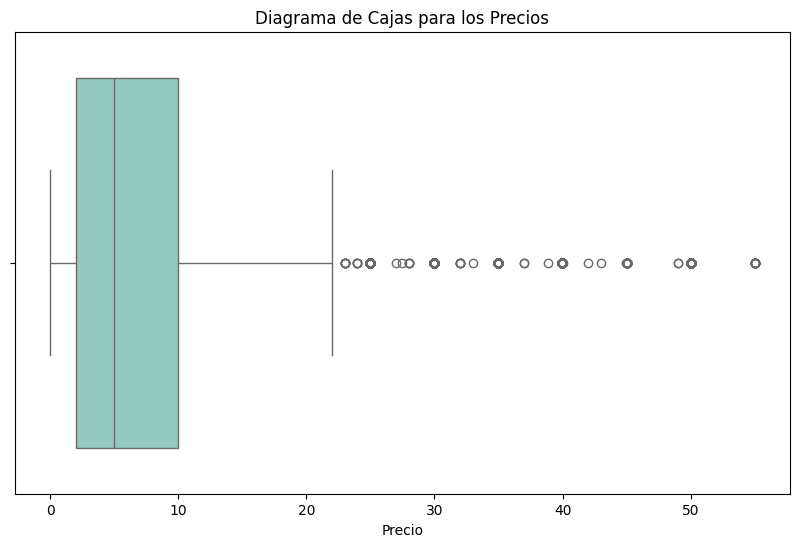

In [58]:
#Diagrama de caja '
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filter['price'], palette='Set3')
plt.title('Diagrama de Cajas para los Precios')
plt.xlabel('Precio')
plt.show()

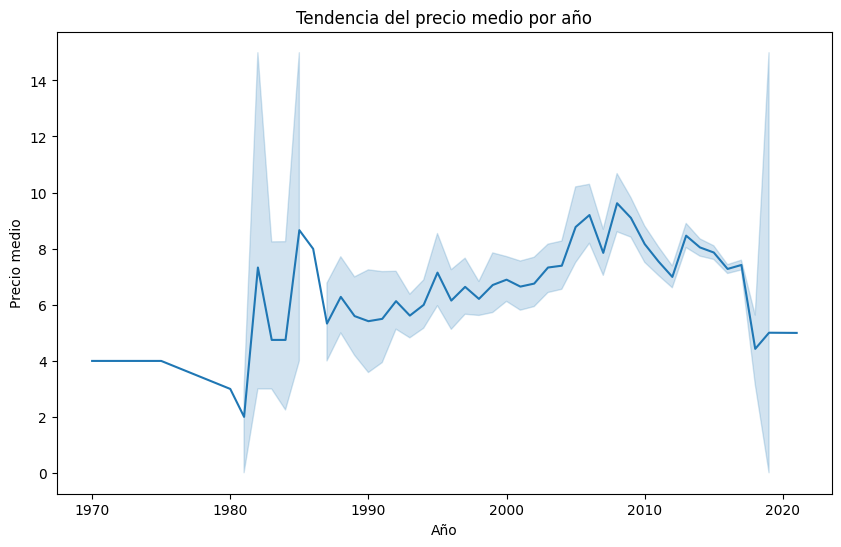

In [55]:
# Veamos el precio a lo largo del Tiempo 
filtro = df_games.groupby('Year')['price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='price', data=df_filter)
plt.title('Tendencia del precio medio por año')
plt.xlabel('Año')
plt.ylabel('Precio medio')
plt.show()

In [26]:
df_games['price'] = df_games['price'].round(2)
count_price = df_games['price'].value_counts()
print(count_price)

price
4.99      4278
9.99      3902
2.99      3429
0.00      3287
0.99      2607
          ... 
26.99        1
179.00       1
10.49        1
6.66         1
160.91       1
Name: count, Length: 145, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

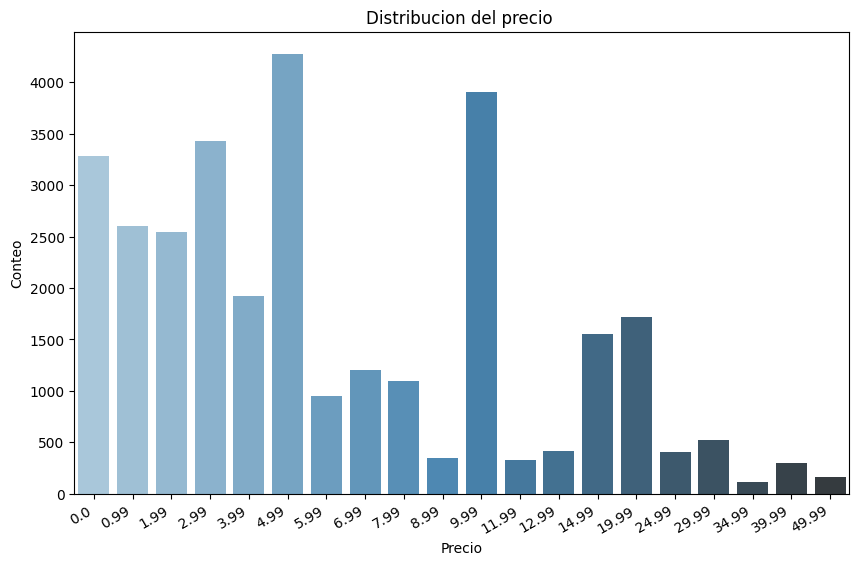

In [27]:
# Limitar a los N precios mas comunes 
N = 20 
top_count = count_price.head(N)
plt.figure(figsize=(10, 6))
sns.barplot(x= top_count.index, y= top_count.values, palette='Blues_d')
plt.title("Distribucion del precio ")
plt.xlabel("Precio")
plt.ylabel("Conteo")
plt.xticks(rotation= 30, ha='right')
plt.show

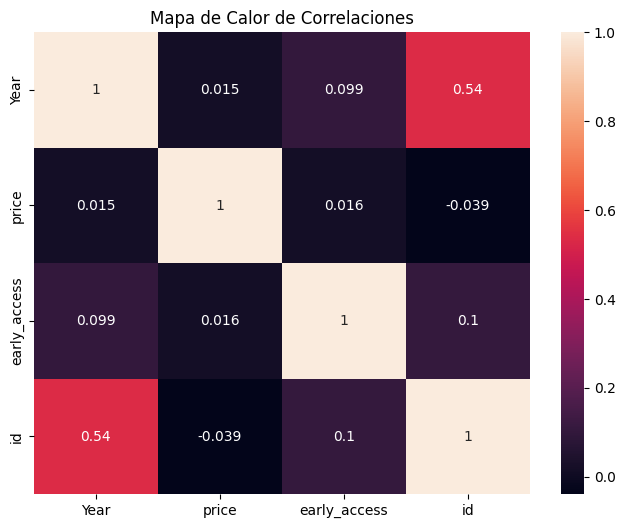

In [28]:
# Veamos la correlacion entre las variables cuantitativas 
plt.figure(figsize=(8,6))
corr = df_games[['Year', 'price', 'early_access', 'id']]
corr = corr.corr()
sns.heatmap(corr, annot=True)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

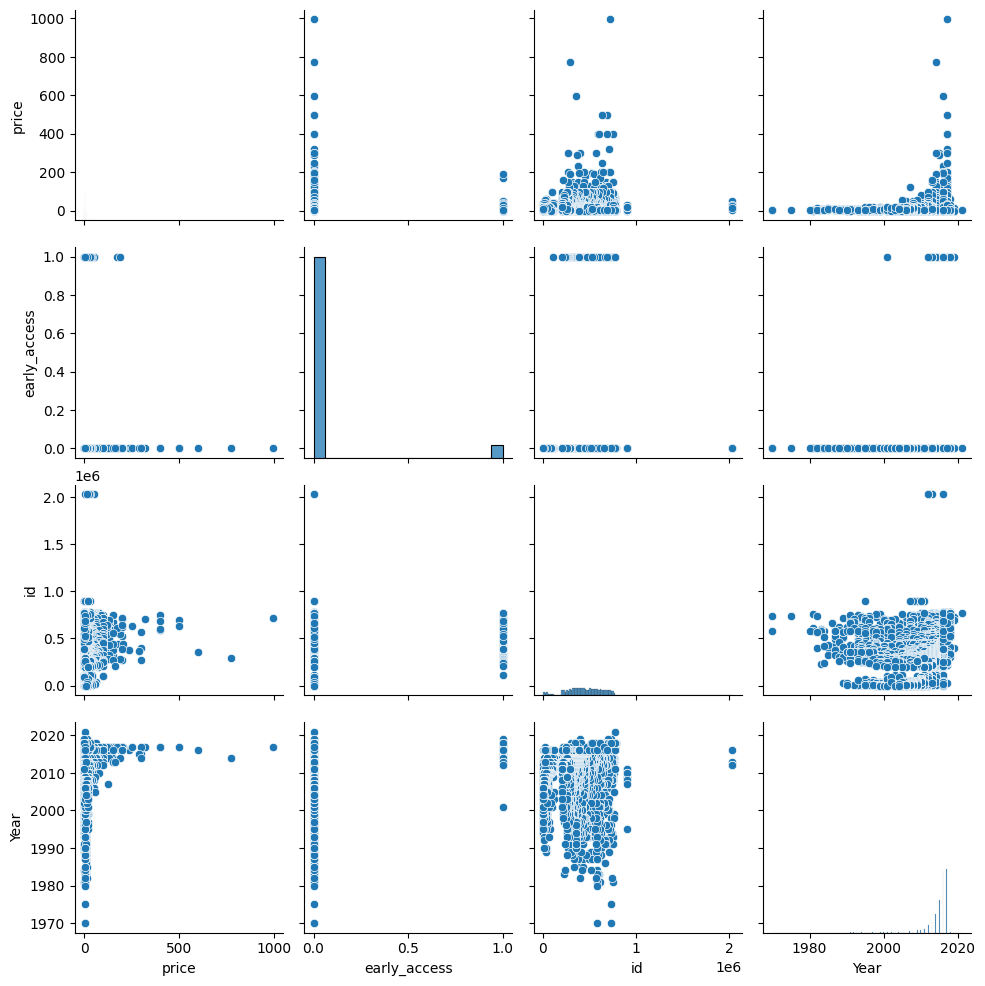

In [29]:
# Grafos adicionales
sns.pairplot(df_games)
plt.show()

### 2.5 Análisis de variables Cualitativas

In [30]:
Categorias = df_games.select_dtypes(include=['object'])
Categorias.dtypes

publisher      object
genres         object
app_name       object
title          object
url            object
tags           object
reviews_url    object
specs          object
developer      object
dtype: object

In [31]:
anidado = Categorias[['genres', 'tags', 'specs']]
anidado.head(4)

,genres,tags,specs
0,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player]
1,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla..."
2,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla..."
3,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",[Single-player]


Tenemos 3 columnas Anidadas donde hay valores para el análisis de variables Cualitativas pero hay que desanidarlas primero, eso haremos en el archivo ETL! 

In [32]:
no_anidado = Categorias[['publisher', 'developer', 'title', 'app_name']]
no_anidado.head(4)

,publisher,developer,title,app_name
0,Kotoshiro,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty
1,"Making Fun, Inc.",Secret Level SRL,Ironbound,Ironbound
2,Poolians.com,Poolians.com,Real Pool 3D - Poolians,Real Pool 3D - Poolians
3,彼岸领域,彼岸领域,弹炸人2222,弹炸人2222


+ Primero las columnas "title" y "app_ name" nos identicas,según el diccionario son esto. <div>
<table>
  <tr>
    <th>Nombre de Campo</th>
    <th>Descripción</th>
    <th>Tipo de Variable</th>
    <th>Tipo de Dato</th>
  </tr>
  <tr>
    <td>title</td>
    <td>Titulo del contenido</td>
    <td>Categorico nominal</td>
    <td>Object</td>
  </tr>
  <tr>
    <td>app_name</td>
    <td>Nombre del contenido</td>
    <td>Categorico nominal</td>
    <td>Object</td>
  </tr>
  </table>
 

+ Segundo las columnas "Developer" y "Publisher" no son identicas, solo en algunas filas coinciden, pero tienen muchos valores faltantes. Según el diccionario <div>
<table>
  <tr>
    <th>Nombre de Campo</th>
    <th>Descripción</th>
    <th>Tipo de Variable</th>
    <th>Tipo de Dato</th>
  </tr>
  <tr>
    <td>Developer</td>
    <td>Desarrollador</td>
    <td>Categorico nominal</td>
    <td>Object</td>
  </tr>
  <tr>
    <td>Publisher</td>
    <td>Empresa publicadora del contenido</td>
    <td>Categorico nominal</td>
    <td>Object</td>
  </tr>
  </table>

In [33]:
# Veamos con code # Verifica si las columnas son de tipo objeto
if pd.api.types.is_object_dtype(no_anidado['developer']) and pd.api.types.is_object_dtype(no_anidado['publisher']):
    # Compara los valores fila por fila
    if (no_anidado['developer'] == no_anidado['publisher']).all():
        print('Las columnas "developer" y "publisher" son idénticas.')
    else:
        print('Las columnas "developer" y "publisher" no son idénticas.')
else:
    print('Las columnas no son de tipo objeto. Comprueba el tipo de datos.')

Las columnas "developer" y "publisher" no son idénticas.


In [34]:
# Veamos el recuento de developer 
count_deve = df_games['developer'].value_counts(ascending=False)
print(count_deve)

developer
Ubisoft - San Francisco       1259
SmiteWorks USA, LLC            813
Dovetail Games                 253
KOEI TECMO GAMES CO., LTD.     232
Paradox Development Studio     156
                              ... 
Royal9Games,RoyalJL              1
Salus Games                      1
Class of  2016-2017              1
Pirotexnik                       1
Bidoniera Games                  1
Name: count, Length: 10992, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

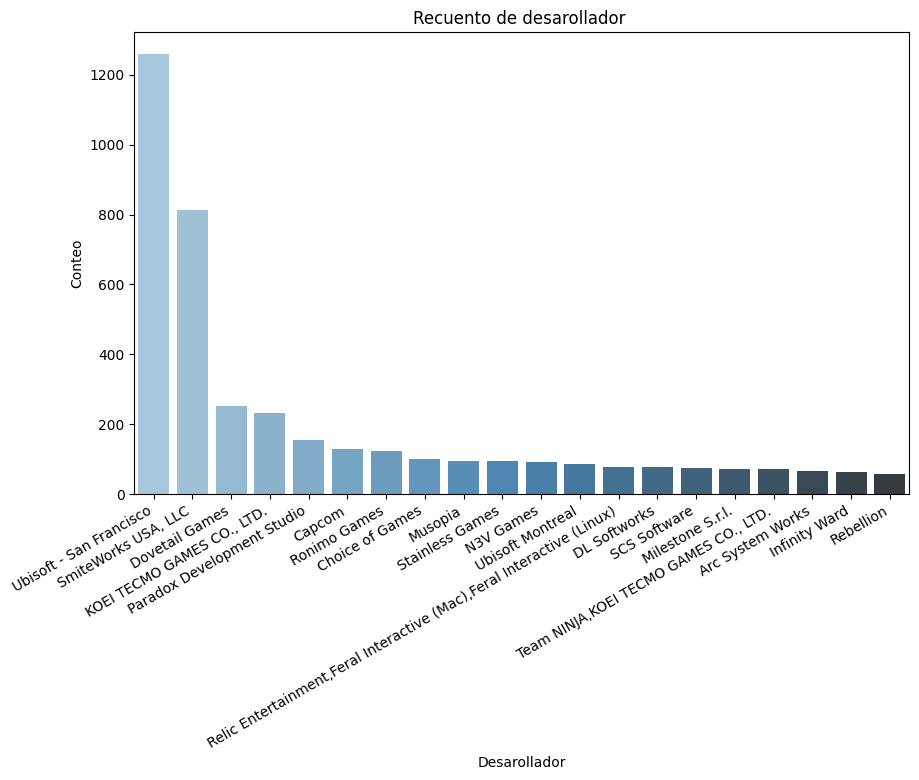

In [35]:
N = 20
top_deve = count_deve.head(N)
# Grafo
plt.figure(figsize=(10, 6))
sns.barplot(x= top_deve.index, y= top_deve.values, palette='Blues_d')
plt.title("Recuento de desarollador ")
plt.xlabel("Desarollador")
plt.ylabel("Conteo")
plt.xticks(rotation= 30, ha='right')
plt.show

Me llama la atencion que el primer valore es ubisots-San Francisco, hay mas Ubisoft? *Contexto* Ubisoft es una empresa Francesa

In [51]:
# Solo queremos ver esas dos columnas
deve_publi = df_games[['developer', 'publisher']]

In [60]:
u_starting_developer_games = deve_publi[deve_publi['developer'].str.startswith('Ub', na=False)]
u_starting_developer_games.sample(2)

,developer,publisher
28616,Ubisoft - San Francisco,None
18745,Ubisoft - San Francisco,None


In [59]:
count_d = u_starting_developer_games['developer'].value_counts()
count_d

developer
Ubisoft - San Francisco                                                                                                                      1259
Ubisoft Montreal                                                                                                                               86
Ubisoft                                                                                                                                        46
Ubisoft Quebec, in collaboration with Ubisoft Annecy, Bucharest, Kiev, Montreal, Montpellier, Shanghai, Singapore, Sofia, Toronto studios      10
Ubisoft Montréal                                                                                                                                8
Ubisoft Montreal, Red Storm, Shanghai, Toronto, Kiev                                                                                            6
Ubisoft Sofia,Ubisoft Kiev                                                                                        

In [58]:
count = u_starting_developer_games['publisher'].value_counts()
count

publisher
Ubisoft                    292
Uber Entertainment           5
Ubisoft Entertainment        3
Ubisoft - San Francisco      1
Name: count, dtype: int64

In [63]:
# Veamos el recuento de publisher
count_publi = df_games['publisher'].value_counts(ascending=False)
print(count_publi)

publisher
Ubisoft                    385
Dovetail Games - Trains    360
Degica                     286
Paradox Interactive        271
SEGA                       251
                          ... 
MB² Entertainment            1
Back Of Nowhere Studios      1
Fourfold Games               1
Atomic Wolf                  1
Bidoniera Games              1
Name: count, Length: 8239, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

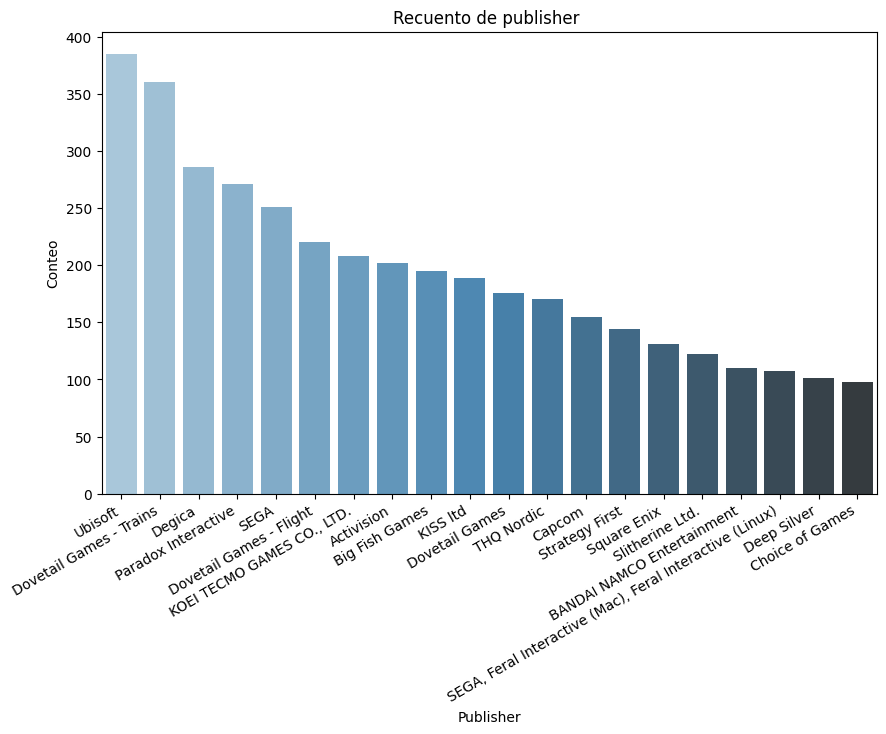

In [64]:
# Recuento de publisher 
N = 20
top_publi= count_publi.head(N)
# Grafo
plt.figure(figsize=(10, 6))
sns.barplot(x= top_publi.index, y= top_publi.values, palette='Blues_d')
plt.title("Recuento de publisher ")
plt.xlabel("Publisher")
plt.ylabel("Conteo")
plt.xticks(rotation= 30, ha='right')
plt.show